In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

submissions = {'IDS': [29956349, 30426856, 30276814, 30270275, 30428273, 30428350, 30428424, 30428793, 30715966, 30715275, 30716317], 
               'LB Scores': [66.24, 82.87, 82.86, 79.38, 82.5, 78.91, 82.75, 81.75, 82.66, 83.02, 83.03], 
               'Validation Scores': [76.36, 90.43, 90.49, 88.49, 90.24, 88.81, 88.9, 89.65, 88.65, 91.19, 91.32]}
scores = pd.DataFrame(submissions)
scores.loc[:, 'delta'] = scores['Validation Scores'] - scores['LB Scores']
scores.loc[:, 'Predicted LB'] = scores['Validation Scores'] - np.mean(scores['delta'])
scores.loc[:, 'Predicted LB lower bound'] = scores['Validation Scores'] - np.mean(scores['delta']) - np.std(scores['delta']) 
scores.loc[:, 'Predicted LB upper bound'] = scores['Validation Scores'] - np.mean(scores['delta']) + np.std(scores['delta']) 

In [4]:
scores

,IDS,LB Scores,Validation Scores,delta,Predicted LB,Predicted LB lower bound,Predicted LB upper bound
0,29956349,66.24,76.36,10.12,68.309091,67.055308,69.562874
1,30426856,82.87,90.43,7.56,82.379091,81.125308,83.632874
2,30276814,82.86,90.49,7.63,82.439091,81.185308,83.692874
3,30270275,79.38,88.49,9.11,80.439091,79.185308,81.692874
4,30428273,82.50,90.24,7.74,82.189091,80.935308,83.442874
5,30428350,78.91,88.81,9.90,80.759091,79.505308,82.012874
6,30428424,82.75,88.90,6.15,80.849091,79.595308,82.102874
7,30428793,81.75,89.65,7.90,81.599091,80.345308,82.852874
8,30715966,82.66,88.65,5.99,80.599091,79.345308,81.852874
9,30715275,83.02,91.19,8.17,83.139091,81.885308,84.392874


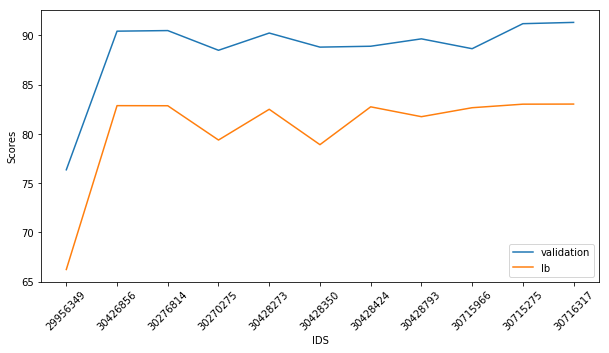

In [5]:
plt.figure(figsize = (10,5))
plt.xticks(np.arange(len(scores)), scores['IDS'].values, rotation = '45')
plt.xlabel('IDS')
plt.ylabel('Scores')
plt.plot(scores['Validation Scores'].values)
plt.plot(scores['LB Scores'].values)
plt.legend(['validation', 'lb'])
plt.show()